<a href="https://colab.research.google.com/github/AllanBottino/Series_Temporais_Python/blob/main/Rolling_S%C3%A9ries_Temporais_Python_Parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Importando as Bibliotecas:

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# O comando abaixo tira umas mensagens chatas.
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

2 - Carregando o dataset:

In [3]:
# Vamos carregar os dois arquivos:

#train=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_train.csv")
#test=pd.read_csv("C:/Users/Allan/Documents/Projetos/store_item_demand_test.csv")

from google.colab import files
uploaded = files.upload()

Saving store_item_demand_test.csv to store_item_demand_test.csv
Saving store_item_demand_train.csv to store_item_demand_train.csv


In [4]:
import io

train = pd.read_csv(io.BytesIO(uploaded['store_item_demand_train.csv']), parse_dates=['date'], index_col='date')

test = pd.read_csv(io.BytesIO(uploaded['store_item_demand_test.csv']), parse_dates=['date'], index_col='date')

# Junto os dois arquivos (train e test) em uma só coisa.
df = pd.concat([train, test])

# Crio uma cópia do dataframe original e uso a cópia, existem inúmeras vantagens de se usar desta maneira.
df1 = df.copy()

# Aqui eu selecionei para vermos apenas o item 1 da store 1.
df1= df1[df1['store']==1]
df1 = df1[df1['item']==1]

# Deleto algumas colunas:
df1.drop(["id", "store", "item"], axis =1, inplace = True)

# Uso o print pois eu acho que fica melhor.
print(df1.head(1))

            sales
date             
2013-01-01   13.0


# 3 - Rolling

In [4]:
print(df1.head())

            sales
date             
2013-01-01   13.0
2013-01-02   11.0
2013-01-03   14.0
2013-01-04   13.0
2013-01-05   10.0


Vamos criar uma nova coluna "Rolling Sales Average" e dentro dele armazenar os resultados da média móvel.



In [5]:
df1['Rolling Sales Average'] = df1.sales.rolling(2).mean()

print(df1.head())

            sales  Rolling Sales Average
date                                    
2013-01-01   13.0                    NaN
2013-01-02   11.0                   12.0
2013-01-03   14.0                   12.5
2013-01-04   13.0                   13.5
2013-01-05   10.0                   11.5


Como podem ver a média móvel pode ser calculada na janela de tempo que você decidir, no caso eu coquei 2, os dois primeiros valores, ou seja: (13 + 11) / 2 = 12.0

In [25]:
df1['Rolling Sales Average'] = df1['sales'].rolling(3).mean ()

print(df1.head(8))

            sales  Rolling Sales Average
date                                    
2013-01-01   13.0                    NaN
2013-01-02   11.0                    NaN
2013-01-03   14.0              12.666667
2013-01-04   13.0              12.666667
2013-01-05   10.0              12.333333
2013-01-06   12.0              11.666667
2013-01-07   10.0              10.666667
2013-01-08    9.0              10.333333


Acho que não é preciso uma explicação, mas mesmo assim vou mostrar o que aconteceu:

(13 + 11 + 14) / 3 = 12.666

(11 + 14 + 13) / 3 = 12.666

(14 + 13 + 10) / 3 = 12.333



# Vamos ver com gráficos:

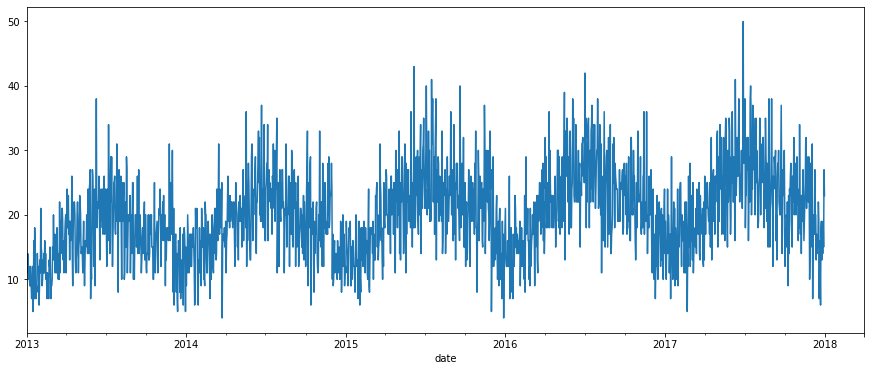

In [ ]:
df1.sales.plot(figsize = (15,6))

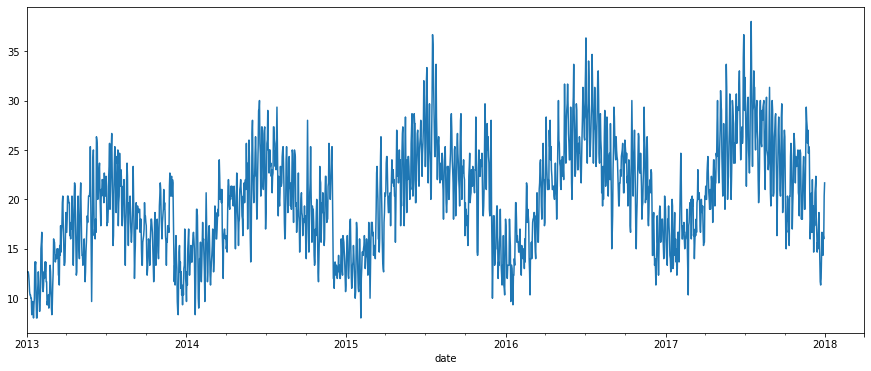

In [ ]:
#Com Rolling:
df1.sales.rolling(3).mean().plot(figsize=(15, 6))

Como podem ver a cima, o gráfico muda dá uma “encolhida”.

Agora vamos ver a média móvel em si:

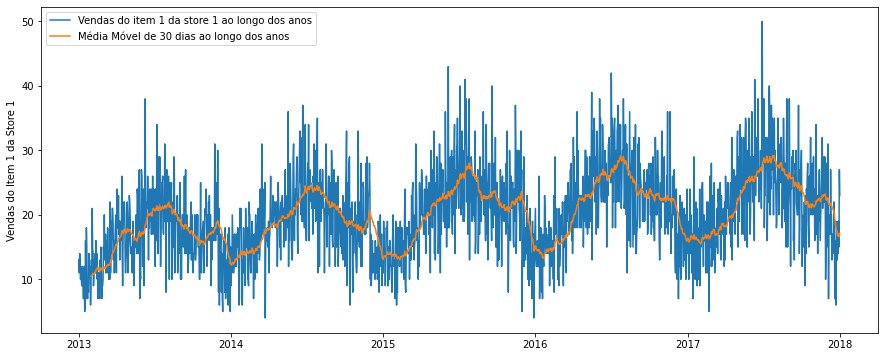

In [37]:
# Crio a Média Móvel para os 30 primeiros dias:
roll = df1.rolling(30).mean()

# Coloco dentro da variável "sales" a os valores da coluna sales.
sales = df1.sales

#Crio o gráfico e defino o tamanho:
fig, ax = plt.subplots(figsize=(15, 6))

#Seto a variável "sales" que criamos a pouco acima:
ax.plot(sales, label='Vendas do item 1 da store 1 ao longo dos anos')

#Seto a variável "roll" no gráfico também:
ax.plot(roll, label='Média Móvel de 30 dias ao longo dos anos')

#Defino o titulo do gráfico:
ax.set_ylabel('Vendas do Item 1 da Store 1')
ax.legend();

# 4 - Qual a diferença entre o Resample, Rolling e asfreq?

Vamos ver:

In [26]:
#Resample:
resample = df1.sales.resample("W").mean()
print("Dataframe com Resample():\n", resample.head(),"\n")

#Asfreq:
asfreq = df1.sales.asfreq("W").mean()
print("Dataframe com Asfreq():\n", asfreq, "\n")

#Rolling:
rolling = df1.sales.rolling(7).mean()
print("Dataframe com Rolling():\n", rolling.head(9))

Dataframe com Resample():
 date
2013-01-06    12.166667
2013-01-13     9.428571
2013-01-20    11.428571
2013-01-27    10.000000
2013-02-03    12.285714
Freq: W-SUN, Name: sales, dtype: float64 

Dataframe com Asfreq():
 23.796934865900383 

Dataframe com Rolling():
 date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
2013-01-06          NaN
2013-01-07    11.857143
2013-01-08    11.285714
2013-01-09    11.428571
Name: sales, dtype: float64


Eu usei o aliases (Offset Aliases) no resample e no asfreq de W (7 dias) e no rolling eu coloquei também uma janela de sete dias.
O Resample como podem ver, fez as médias dos sete primeiros dias (somou os 7 primeiros dias e dividiu por eles mesmos).
2013-01-06    12.166667
2013-01-13     9.428571
2013-01-20    11.428571
2013-01-27    10.000000
2013-02-03    12.285714
O Asfreq somou os primeiros sete dias e dividiu por eles mesmos
23.796934865900383
O Rolling só “soltou” o primeiro valor após pegar os primeiros sete dias, somar tudo e dividir por eles mesmo.         

Dataframe Original:   
2013-01-01   13.0
2013-01-02   11.0
2013-01-03   14.0
2013-01-04   13.0
2013-01-05   10.0
2013-01-06   12.0
2013-01-07   10.0


Dataframe com Rolling:
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
2013-01-06          NaN
2013-01-07    11.857143
2013-01-08    11.285714
2013-01-09    11.428571
(13 + 11 + 14 + 13 + 10 + 12 + 10) \ 7 = 11.857143


# 5 - Média Móvel e Desvio Padrão:

Também podemos ver o desvio padrão em relação a média móvel e ver como os dados se comportam.

In [5]:
#Média móvel:
df1['Rolling Sales Average'] = df1["sales"].rolling(30).mean()

#Desvio padrão sobre a média móvel:
df1['Rolling Sales Std'] = df1["sales"].rolling(30).std()

print(df1.loc["2013-01-29":].head(10))

            sales  Rolling Sales Average  Rolling Sales Std
date                                                       
2013-01-29    6.0                    NaN                NaN
2013-01-30    9.0              10.500000           3.104502
2013-01-31   13.0              10.500000           3.104502
2013-02-01   11.0              10.500000           3.104502
2013-02-02   21.0              10.733333           3.600128
2013-02-03   15.0              10.800000           3.661543
2013-02-04   14.0              10.933333           3.703990
2013-02-05    9.0              10.833333           3.714680
2013-02-06   10.0              10.833333           3.714680
2013-02-07   13.0              10.966667           3.718392


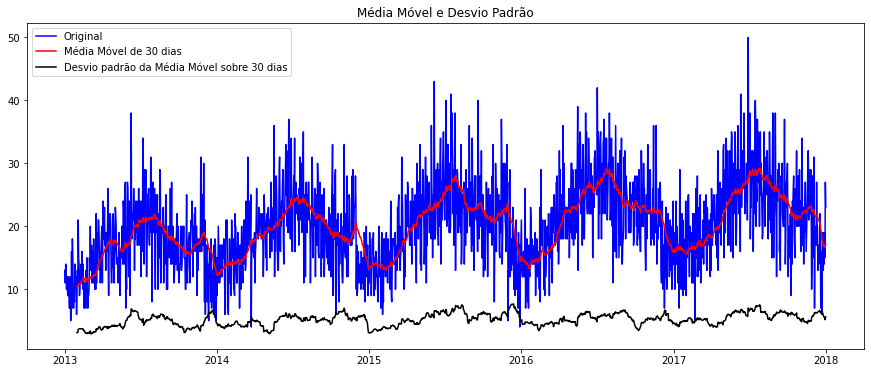

In [40]:
def janela (timeseries, window = 30):

    #Criando a média móvel(rolmean) e o desvio padrão da média móvel(rolstd):
    media_movel = timeseries.rolling(window).mean()
    media_movel_std = timeseries.rolling(window).std()

   #Criando o gráfico original:
    fig = plt.figure(figsize=(15, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')

   # Criando o gráfico da média e do desvio padrão:
    mean = plt.plot(media_movel, color='red', label='Média Móvel de 30 dias')
    std = plt.plot(media_movel_std, color='black', label = 'Desvio padrão da Média Móvel sobre 30 dias')

  # Criando a legenda do gráfico:
    plt.legend(loc='best')
    plt.title('Média Móvel e Desvio Padrão')
    plt.show()

# E Aqui o comando para plotar tudo, levando em consideração a coluna "sales" que é o que nos interessa.
janela(df1['sales']) # A identação tem que estar deste jeito.